In [5]:
#missing value ration
from pandas import read_csv
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

#load data
header_names =['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
my_data = read_csv(r'C:\Users\Lawre\Documents\MSc Applied AI\AE1 - AI and Business - Mental Health\pima_indians_diabetes_2.csv', names=header_names)

#get dimension
print('dimension:', my_data.shape)

#get row with empty values from data frame
empty_value_data = my_data[my_data.isna().any(axis=1)]
print('empty values:', empty_value_data)
print(len(empty_value_data), '\n ----------empty rows of diabetic data----------\n')

#get % of missing values by variables
perc_missing = my_data.isnull().sum()/len(my_data)*100
print('Missing data percentage:', perc_missing)


dimension: (771, 9)
empty values:      preg   plas  pres  skin  test  mass   pedi   age  class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0      0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0      0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN      0
3 
 ----------empty rows of diabetic data----------

Missing data percentage: preg     0.000000
plas     0.129702
pres     0.129702
skin     0.000000
test     0.129702
mass     0.129702
pedi     0.000000
age      0.129702
class    0.000000
dtype: float64


In [8]:
#missing value ration
from pandas import read_csv
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

#load data
header_names =['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
my_data = read_csv(r'C:\Users\Lawre\Documents\MSc Applied AI\AE1 - AI and Business - Mental Health\pima_indians_diabetes_2.csv', names=header_names)

#get dimension
print('dimension:', my_data.shape)

#holding missing values
perc_missing = my_data.isnull().sum()/len(my_data)*100

#sacing column names in a variable
var_list = my_data.columns
var = []
for i in range (0,9):
    if perc_missing[i]<=.1:
        var.append(var_list[i])
print(var)

dimension: (771, 9)
['preg', 'skin', 'pedi', 'class']


In [12]:
#low variance filter
from pandas import read_csv
import numpy as np
import pandas as pd
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, Normalizer

#load data
header_names =['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
my_data = read_csv(r'C:\Users\Lawre\Documents\MSc Applied AI\AE1 - AI and Business - Mental Health\pima_indians_diabetes_2.csv', names=header_names)

#get dimension
print('dimension:', my_data.shape)

#get row with empty values from data frame
empty_value_data = my_data[my_data.isna().any(axis=1)]
print(empty_value_data)
print(len(empty_value_data), '\n ----------empty rows of diabetic data----------\n')

#use the simple imputer function to replace the missing values
imputer = SimpleImputer(strategy='most_frequent')#replace with median, mean and observe 
imputer.fit(my_data)
my_data = imputer.transform(my_data)

#load data back into dataframe
my_data = pd.DataFrame(my_data, columns=header_names)

#check the row with empty values from the dataframe
empty_value_data = my_data[my_data.isna().any(axis=1)]
print(empty_value_data)
print(len(empty_value_data), '\n----------- empty rows of the diabetic data----------\n')

#check the missing value ratio
miss_ratio = my_data.isnull().sum()/len(my_data)*100
print('Missing ratio:\n', miss_ratio)

#normalise the data as our data does not assume a normality
#diab_data_normalizer = Normalizer(norm='l2').fit(my_data)
#my_normalised_data = diab_data_normalizer.transform(my_data)
#diab_data = pd.DataFrame(my_normalised_data, columns=header_names)

#without normalisation
diab_data = pd.DataFrame(my_data, columns=header_names)

#checking the variance of numerical values
data_variance = diab_data.var()
print('\nThe dara variance \n', data_variance)#pedi and preg has low variance
#class certain have low variance due to 0 and 1 values

diab_data = diab_data.columns
variab = []
for i in range(0, len(data_variance)):
    if data_variance[i]>=10000: #set the threshold betwee 10 and 1000 (0.0001 and 0.1 for normalised data)
        variab.append(diab_data[i+1])
        
print('\n Variables', variab)


dimension: (771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0      0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0      0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN      0
3 
 ----------empty rows of diabetic data----------

Empty DataFrame
Columns: [preg, plas, pres, skin, test, mass, pedi, age, class]
Index: []
0 
----------- empty rows of the diabetic data----------

Missing ratio:
 preg     0.0
plas     0.0
pres     0.0
skin     0.0
test     0.0
mass     0.0
pedi     0.0
age      0.0
class    0.0
dtype: float64

The dara variance 
 preg        11.323031
plas      1018.889221
pres       373.508222
skin       253.597638
test     13248.205239
mass        61.964576
pedi         0.109687
age        138.254589
class        0.227069
dtype: float64

 Variables ['mass']


In [1]:
#high correlation filter
from pandas import read_csv
import numpy as np
import pandas as pd
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

#load your data into a dataframe
header_names =['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
my_data = read_csv(r'C:\Users\Lawre\Documents\MSc Applied AI\AE1 - AI and Business - Mental Health\pima_indians_diabetes_2.csv', names=header_names)

#get dimension
print('dimension:', my_data.shape)

#get row with empty values from data frame
empty_value_data = my_data[my_data.isna().any(axis=1)]
print(empty_value_data)
print(len(empty_value_data), '\n ----------empty rows of diabetic data----------\n')

#use the simple imputer function to replace the missing values
imputer = SimpleImputer(strategy='most_frequent')#replace with median, mean and observe 
imputer.fit(my_data)
my_data = imputer.transform(my_data)

#load data back into dataframe
my_data = pd.DataFrame(my_data, columns=header_names)

#check the row with empty values from the dataframe
empty_value_data = my_data[my_data.isna().any(axis=1)]
print(empty_value_data)
print(len(empty_value_data), '\n----------- empty rows of the diabetic data----------\n')

#check the missing value ratio
miss_ratio = my_data.isnull().sum()/len(my_data)*100
print('Missing ratio:\n', miss_ratio)

#checking the variance of numerical values
data_corr = my_data.corr()
print('\nThe Data Correlation:\n', data_corr)



dimension: (771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0      0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0      0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN      0
3 
 ----------empty rows of diabetic data----------

Empty DataFrame
Columns: [preg, plas, pres, skin, test, mass, pedi, age, class]
Index: []
0 
----------- empty rows of the diabetic data----------

Missing ratio:
 preg     0.0
plas     0.0
pres     0.0
skin     0.0
test     0.0
mass     0.0
pedi     0.0
age      0.0
class    0.0
dtype: float64

The Data Correlation:
            preg      plas      pres      skin      test      mass      pedi  \
preg   1.000000  0.129870  0.141921 -0.082336 -0.072162  0.017556 -0.035342   
plas   0.129870  1.000000  0.153007  0.056968  0.331677  0.221304  0.136233   
pres   0.141921  0.153007  1.000000  0.206745  0.089727  0.281955  0.039917   
skin  -0.082336  0.056968  0.206745  1.000000  

dimension: (771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  diab_class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0           0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0           0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN           0
3 
 ----------empty rows of diabetic data----------



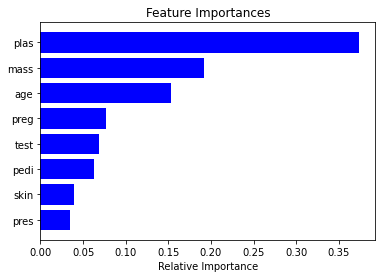

In [4]:
#random forest classifier
from pandas import read_csv
import numpy as np
import pandas as pd
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt

#load your data into a dataframe
header_names =['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diab_class']
my_data = read_csv(r'C:\Users\Lawre\Documents\MSc Applied AI\AE1 - AI and Business - Mental Health\pima_indians_diabetes_2.csv', names=header_names)

#get dimension
print('dimension:', my_data.shape)

#get row with empty values from data frame
empty_value_data = my_data[my_data.isna().any(axis=1)]
print(empty_value_data)
print(len(empty_value_data), '\n ----------empty rows of diabetic data----------\n')

#use the simple imputer function to replace the missing values
imputer = SimpleImputer(strategy='most_frequent')#replace with median, mean and observe 
imputer.fit(my_data)
my_data = imputer.transform(my_data)

#load data back into dataframe
my_data = pd.DataFrame(my_data, columns=header_names)

X_data = my_data.drop(['diab_class'], axis=1)

#declare the random forest model
rf_model = RandomForestClassifier(random_state=1, max_depth=4)

#fit the random forest model
rf_model.fit(X_data, my_data.diab_class)

train_features = X_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-9:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [train_features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

dimension: (771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  diab_class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0           0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0           0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN           0
3 
 ----------empty rows of diabetic data----------



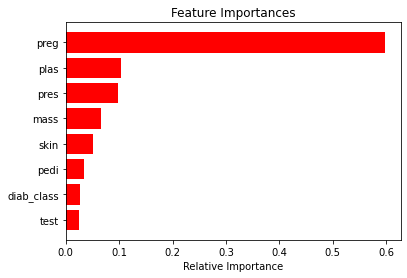

In [5]:
from pandas import read_csv
import numpy as np
import pandas as pd
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt

#load your data into a dataframe
header_names =['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diab_class']
my_data = read_csv(r'C:\Users\Lawre\Documents\MSc Applied AI\AE1 - AI and Business - Mental Health\pima_indians_diabetes_2.csv', names=header_names)

#get dimension
print('dimension:', my_data.shape)

#get row with empty values from data frame
empty_value_data = my_data[my_data.isna().any(axis=1)]
print(empty_value_data)
print(len(empty_value_data), '\n ----------empty rows of diabetic data----------\n')

#use the simple imputer function to replace the missing values
imputer = SimpleImputer(strategy='most_frequent')#replace with median, mean and observe 
imputer.fit(my_data)
my_data = imputer.transform(my_data)

#load data back into dataframe
my_data = pd.DataFrame(my_data, columns=header_names)

X_data = my_data.drop(['age'], axis=1)

#declare the random forest regression model
rf_model = RandomForestRegressor(random_state=1, max_depth=4)

#fit the random forest model
rf_model.fit(X_data, my_data.age)

train_features = X_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-9:] #top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [train_features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [6]:
from pandas import read_csv
import numpy as np
import pandas as pd
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import RFE

#load your data into a dataframe
header_names =['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diab_class']
my_data = read_csv(r'C:\Users\Lawre\Documents\MSc Applied AI\AE1 - AI and Business - Mental Health\pima_indians_diabetes_2.csv', names=header_names)

#get dimension
print('dimension:', my_data.shape)

#get row with empty values from data frame
empty_value_data = my_data[my_data.isna().any(axis=1)]
print(empty_value_data)
print(len(empty_value_data), '\n ----------empty rows of diabetic data----------\n')

#use the simple imputer function to replace the missing values
imputer = SimpleImputer(strategy='most_frequent')#replace with median, mean and observe 
imputer.fit(my_data)
my_data = imputer.transform(my_data)

#load data back into dataframe
my_data = pd.DataFrame(my_data, columns=header_names)

#extract the x data - independent variables
X_data = my_data.drop(['age'], axis=1)

#declare a linear model
regress_model = LinearRegression()

#recursive feature elimination
rfe = RFE(regress_model, n_features_to_select=3, step=1)
rfe = rfe.fit(X_data, my_data.diab_class)

print('Number of Features:', rfe.n_features_)
print('Selected Features:', rfe.support_)
print('Feature Ranking:', rfe.ranking_)


dimension: (771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  diab_class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0           0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0           0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN           0
3 
 ----------empty rows of diabetic data----------

Number of Features: 3
Selected Features: [False False False False False  True  True  True]
Feature Ranking: [3 4 6 2 5 1 1 1]


In [9]:
from pandas import read_csv
import numpy as np
import pandas as pd
from numpy import set_printoptions
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression

#load your data into a dataframe
header_names =['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diab_class']
my_data = read_csv(r'C:\Users\Lawre\Documents\MSc Applied AI\AE1 - AI and Business - Mental Health\pima_indians_diabetes_2.csv', names=header_names)

#get dimension
print('dimension:', my_data.shape)

#get row with empty values from data frame
empty_value_data = my_data[my_data.isna().any(axis=1)]
print(empty_value_data)
print(len(empty_value_data), '\n ----------empty rows of diabetic data----------\n')

#use the simple imputer function to replace the missing values
imputer = SimpleImputer(strategy='most_frequent')#replace with median, mean and observe 
imputer.fit(my_data)
my_data = imputer.transform(my_data)

#load data back into dataframe
my_data = pd.DataFrame(my_data, columns=header_names)

#extract the x data - independent variables
X_data = my_data.drop(['age'], axis=1)

ffe = f_regression(X_data, my_data.age)
variab = []
for i in range (0, len(X_data.columns)-1):
    if ffe[0][i]>=50: #check variables importance over 10 percent
        variab.append(X_data.columns[i])
print(variab)

dimension: (771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  diab_class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0           0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0           0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN           0
3 
 ----------empty rows of diabetic data----------

['preg', 'plas']


Testing Factor Analysis
dimension: (771, 9)
     preg   plas  pres  skin  test  mass   pedi   age  diab_class
440     2  120.0   NaN    26  16.0  36.8  0.766  22.0           0
661     2  120.0  58.0    26  16.0   NaN  0.766  22.0           0
770     2    NaN  58.0    26   NaN  28.4  0.766   NaN           0
3 
 ----------empty rows of diabetic data----------

---------Computing Factor Analysis------------


Chi2 Value: 877.7160952794964 
P-Value: 4.5843115700402835e-167

KMO: 0.6042990334423318

 Confirming the X Data:
    preg   plas  pres  skin  test  mass   pedi  diab_class
0   6.0  148.0  72.0  35.0   0.0  33.6  0.627         1.0
1   1.0   85.0  66.0  29.0   0.0  26.6  0.351         0.0

Eigen Values: [2.26817007 1.37268131 1.09478895 0.87133577 0.79149143 0.73429846
 0.47561032 0.39162368] 
Vectors: 
 [ 1.74186554  0.81646583  0.45733493  0.1512741   0.06652004 -0.03696236
 -0.0552637  -0.18807421]


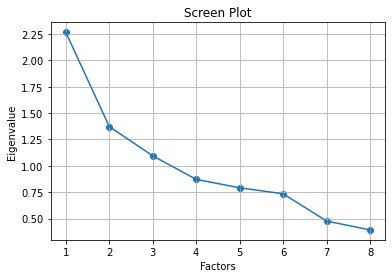

    Factor1   Factor2   Factor3
0 -0.174961  0.315572  0.069935
1  0.402444  0.647530 -0.143542
2 -0.051952  0.063610  0.392283
3  0.389513 -0.308821  0.544120
4  0.797931  0.002415 -0.075811
5  0.038501  0.097402  0.622810
6  0.224687  0.072164  0.072345
7  0.114255  0.625217  0.078984

 Factors Variance (array([1.04870662, 1.02389483, 0.8805587 ]), array([0.13108833, 0.12798685, 0.11006984]), array([0.13108833, 0.25907518, 0.36914502]))
(771, 3)


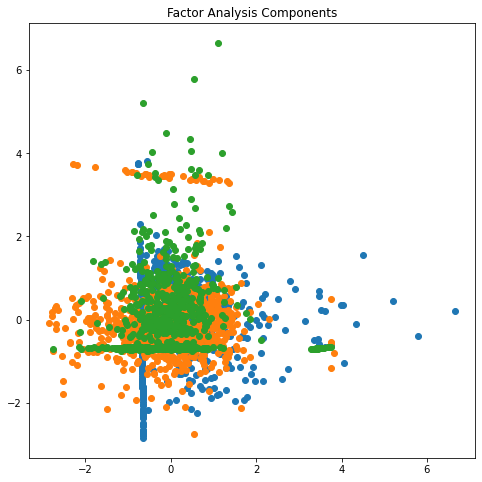

In [9]:
#factor analysis
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

print('Testing Factor Analysis')

#load your data into a dataframe
header_names =['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'diab_class']
my_data = read_csv(r'C:\Users\Lawre\Documents\MSc Applied AI\AE1 - AI and Business - Mental Health\pima_indians_diabetes_2.csv', names=header_names)

#get dimension
print('dimension:', my_data.shape)

#get row with empty values from data frame
empty_value_data = my_data[my_data.isna().any(axis=1)]
print(empty_value_data)
print(len(empty_value_data), '\n ----------empty rows of diabetic data----------\n')

#use the simple imputer function to replace the missing values
imputer = SimpleImputer(strategy='most_frequent')#replace with median, mean and observe 
imputer.fit(my_data)
my_data = imputer.transform(my_data)

#normalisethedataset
#normalisecodehere

#convert data back to frame and bind the headers
my_data = pd.DataFrame(my_data, columns = header_names)

#extract the X data - independent variables
X_data=my_data.drop(['age'], axis=1) #for regression
X2_data=my_data.drop(['diab_class'], axis=1) #for classification

print('---------Computing Factor Analysis------------\n')
#checking for factorability
#calculate the chi2 value and the p-value - bartletts test of spherity check
#p-value less than .05 represents statistical significance hence employ a factor analysis
chi_square_value, p_value=calculate_bartlett_sphericity(X_data)
print('\nChi2 Value:', chi_square_value, '\nP-Value:', p_value)

#check the data suitability for factor analysis
kmo_all, kmo_model=calculate_kmo(X_data)
print('\nKMO:', kmo_model)# values usually between 0 and 1 = kmo, below 0.6 are considered inadequate for FA

print('\n Confirming the X Data:\n', X_data.head(2))

#implement factor analysis using the factor analyser
fa=FactorAnalyzer()
transformed_X = fa.fit(X_data)

#getting the eigenvalues
eigen_values, vectors = fa.get_eigenvalues()
print('\nEigen Values:', eigen_values, '\nVectors: \n', vectors)# eigen values greater than1  are considered fact

#create the Screen plot for cecking number of factors
plt.scatter(range(1, X_data.shape[1]+1), eigen_values)
plt.plot(range(1, X_data.shape[1]+1), eigen_values)
plt.title('Screen Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

#load the factors
loadings = fa.loadings_ #we can consider features above 0.5 as high, loading rule of thumb = 0.7
new_factor = pd.DataFrame(loadings, columns = ['Factor1', 'Factor2', 'Factor3'])
print(new_factor)

#get factors variance
fac_variance = fa.get_factor_variance()
print('\n Factors Variance', fac_variance)

#confirmatory factor analysis setting the numbers of factors
FA = FactorAnalysis(n_components=3, random_state=1)
transformed_X = FA.fit_transform(X_data.values)
print(transformed_X.shape)

#plotting factors on 2d chart
plt.figure(figsize=(8,8))
plt.title('Factor Analysis Components')
plt.scatter(transformed_X[:, 0], transformed_X[:,1])
plt.scatter(transformed_X[:, 1], transformed_X[:,2])
plt.scatter(transformed_X[:, 2], transformed_X[:,0])
plt.show()

#See pycharm script to run properly


In [6]:
pip install --user factor_analyzer

  Using cached factor_analyzer-0.3.2-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.
